# Importing Libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import os

# Merging Sales Data Together In Single Csv File

### Loading Datasets

In [43]:
df = pd.read_csv('./dataset/Sales_January_2019.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Loading all 12 months files

In [144]:
files =  os.listdir('./dataset')

dataset = pd.DataFrame()

for file in files:
    twelve_months_data = pd.read_csv('./dataset/'+file)
    dataset = pd.concat([dataset, twelve_months_data])
    
    dataset.to_csv('all_twelve_months_data.csv')

#### Load The Updated Dataframe

In [106]:
salesData = pd.read_csv('all_twelve_months_data.csv')

salesData.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

In [107]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


######  Drop NAN Data

In [108]:
salesData.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [109]:
nanData = salesData[salesData.isna().any(axis=1)]
nanData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
nanData.shape

(545, 6)

In [111]:
salesData = salesData.dropna(how = 'all')

salesData.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Check For Unique Values of Columns

In [112]:
salesData['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [113]:
findChar= salesData[salesData['Order Date'].str[0:2] == 'Or']
findChar.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


###### Remove characters from 'Order Date' Column

In [114]:
salesData= salesData[salesData['Order Date'].str[0:2] != 'Or']

###### Change DataType

In [115]:
salesData['Quantity Ordered'] = pd.to_numeric(salesData['Quantity Ordered'])
salesData['Price Each'] = pd.to_numeric(salesData['Price Each'])

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Extracting Data

###### Add Month & year Columns

In [116]:
#Add Month Column
salesData['Date By Month'] = salesData['Order Date'].str[0:2]
salesData['Date By Month'] = salesData['Date By Month'].astype('int32')

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [117]:
#Add Year Column
salesData['Year'] = salesData['Order Date'].str[6:8]
salesData['Year'] = salesData['Year'].astype('int32')
salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,19
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,19


###### Add Hours & Minuts  Columns

In [118]:
salesData['Order Date'] = pd.to_datetime(salesData['Order Date'])

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,19
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,19


In [119]:
salesData['Hour'] = salesData['Order Date'].dt.hour
salesData['Minute'] = salesData['Order Date'].dt.minute

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Year,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,19,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,19,9,27


###### Add  Total Sales  column

In [120]:
salesData['Total Sales'] = salesData['Quantity Ordered'] * salesData['Price Each']
salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Year,Hour,Minute,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,19,22,30,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19,14,38,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19,14,38,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,19,9,27,11.99


###### Split City & State  In a New Column

In [121]:
def getCity(address):
    return address.split(",")[1]

def getState(address):
    return address.split(",")[2].split(' ')[1]

salesData['City'] = salesData['Purchase Address'].apply(lambda x: getCity(x))
salesData['State'] = salesData['Purchase Address'].apply(lambda x: getState(x))

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Year,Hour,Minute,Total Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,8,46,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,19,22,30,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19,14,38,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,19,14,38,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,19,9,27,11.99,Los Angeles,CA


# Data Exploration

### What was the best month for sales? How much was earned that month?

In [122]:
BestMonthSales = salesData.groupby('Date By Month').sum()
BestMonthSales.head()

,Quantity Ordered,Price Each,Year,Hour,Minute,Total Sales
Date By Month,,,,,,
1,10903,1811768.38,184505,139485,282440,1822256.73
2,13449,2188884.72,227525,172669,354885,2202022.42
3,17005,2791207.83,287907,218969,447559,2807100.38
4,20558,3367671.02,347301,262259,544186,3390670.24
5,18667,3135125.13,314754,238780,487899,3152606.75


Text(0.5, 0, 'Months')

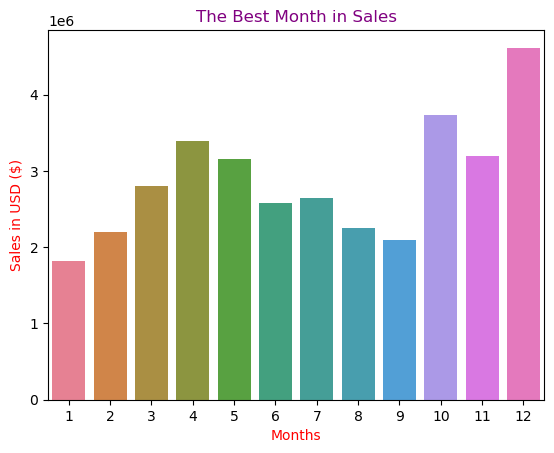

In [123]:
sns.barplot(x = BestMonthSales.index,  y = BestMonthSales['Total Sales'], 
            data = BestMonthSales, palette ="husl")
plt.title('The Best Month in Sales', color ='purple')
plt.ylabel('Sales in USD ($)', color = 'red')
plt.xlabel('Months', color = 'red')

### What is the best Year for sales? How much earned in that Year?

[Text(0, 0, '185916.0'), Text(0, 0, '34.0')]

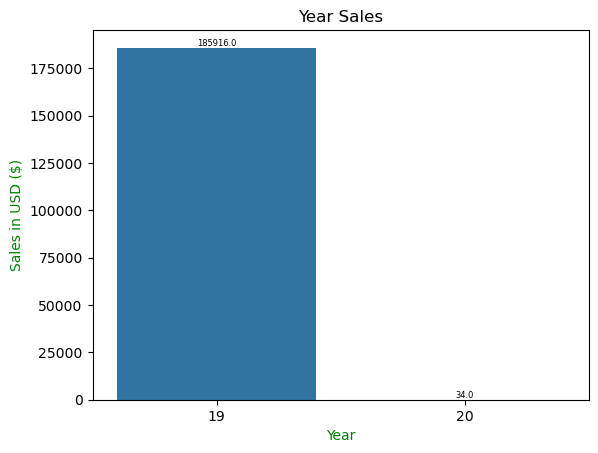

In [126]:
yearSales = sns.countplot(x = 'Year', data = salesData)
plt.title("Year Sales")
plt.xlabel("Year", color="green")
plt.ylabel( "Sales in USD ($)", color="green")

yearSales.bar_label(yearSales.containers[0], fmt='%.1f' ,fontsize = 6)

### What city has the highest number of sales?

In [155]:
SalesInUsa = salesData.groupby(['State','City']).sum()
SalesInUsa

Quantity Ordered  Price Each  Date By Month    Year  \
State City                                                                  
CA     Los Angeles               33289  5421435.23         208325  562496   
       San Francisco             50239  8211461.74         315520  849920   
GA     Atlanta                   16602  2779908.20         104794  282739   
MA     Boston                    22528  3637409.77         141112  378750   
ME     Portland                   2750   447189.25          17144   46645   
NY     New York City             27932  4635370.83         175741  472654   
OR     Portland                  11303  1860558.22          70621  190192   
TX     Austin                    11153  1809873.61          69829  188197   
       Dallas                    16730  2752627.82         104620  281582   
WA     Seattle                   16553  2733296.01         104941  279909   

                      Total Sales  
State City                         
CA     Los Angeles     5452570.80  
       San Francisco   8262203.91  
GA     Atlanta         2795498.58  
MA     Boston          3661642.01  
ME     Portland         449758.27  
NY     New York City   4664317.43  
OR     Portland        1870732.34  
TX     Austin          1819581.75  
       Dallas          2767975.40  
WA     Seattle         2747755.48

[Text(0, 0, '5452570.8'),
 Text(0, 0, '8262203.9'),
 Text(0, 0, '2795498.6'),
 Text(0, 0, '3661642.0'),
 Text(0, 0, '1160245.3'),
 Text(0, 0, '4664317.4'),
 Text(0, 0, '1819581.8'),
 Text(0, 0, '2767975.4'),
 Text(0, 0, '2747755.5')]

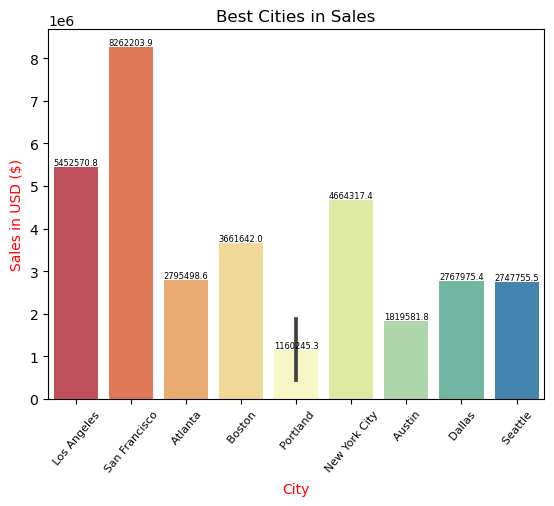

In [211]:
ax = sns.barplot(x = SalesInUsa.index.get_level_values("City"),  y = SalesInUsa["Total Sales"], 
            data = SalesInUsa, palette = "Spectral")
plt.xticks(rotation = 50, size = 8)
plt.title( "Best Cities in Sales")
plt.xlabel( "City", color = "red")
plt.ylabel('Sales in USD ($)', color = "red")

ax.bar_label(ax.containers[0], fmt='%.1f' ,fontsize = 6)



### What city has the highest number of sales?¶

Text(0, 0.5, 'Sales in USD ($)')

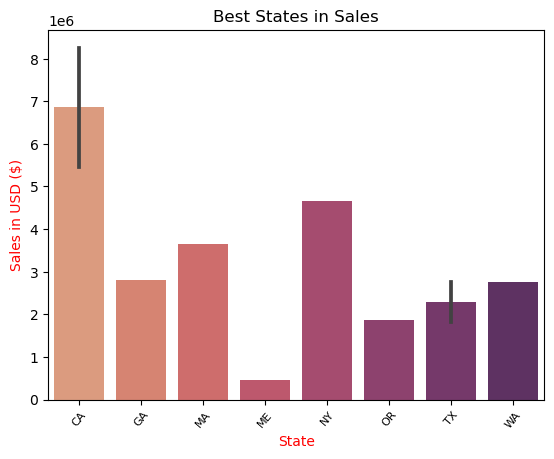

In [168]:
ax2 = sns.barplot(x = SalesInUsa.index.get_level_values("State"),  y = SalesInUsa["Total Sales"], 
            data = SalesInUsa, palette = "flare")
plt.xticks(rotation = 50, size = 8)
plt.title( "Best States in Sales")
plt.xlabel( "State", color = "red")
plt.ylabel('Sales in USD ($)', color = "red")



### what time should we display advertisments to maximize likelihood of customer's buying product?

In [147]:
SalesInHours = salesData.groupby(['Hour']).sum()
SalesInHours

,Quantity Ordered,Price Each,Date By Month,Year,Minute,Total Sales
Hour,,,,,,
0,4428,709296.70,27554,74302,103596,713721.27
1,2619,458490.00,16657,44659,61807,460866.88
2,1398,233833.64,8507,23621,32508,234851.44
3,928,144726.42,5904,15792,23044,145757.89
4,937,162058.18,6148,16230,26876,162661.01
5,1493,229621.21,9301,25101,42877,230679.82
6,2810,445000.11,17539,47158,80343,448113.00
7,4556,740568.11,28850,76209,127447,744854.12
8,7002,1185970.62,43626,118864,198135,1192348.97


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Hour')


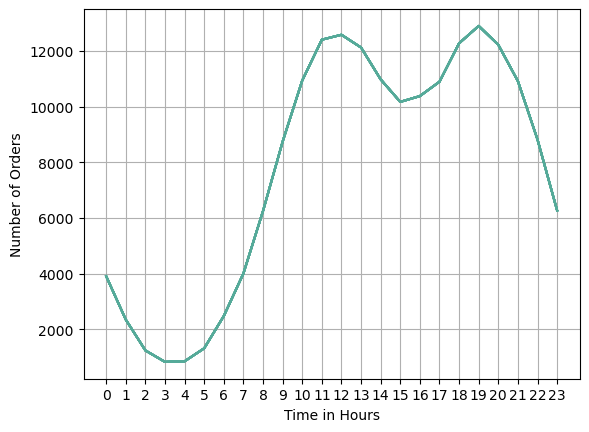

In [150]:
hours = salesData.groupby(['Hour']).sum()
print(hours.index)
plt.plot(hours.index, salesData.groupby(['Hour']).count(), color = '#5A9')
plt.xticks(hours.index)
plt.xlabel('Time in Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#  12 AM & 7 PM is the best time to display advertisments

### What Products sold the most? Why do you think it sold the most?

In [160]:
products = salesData.groupby(['Product']).sum()
products

,Quantity Ordered,Price Each,Date By Month,Year,Hour,Minute,Total Sales
Product,,,,,,,
20in Monitor,4129,451068.99,29336,77921,58764,122252,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,118371,90916,184331,2435097.56
27in FHD Monitor,7550,1125974.93,52558,142636,107540,219948,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,117439,89076,183480,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,390963,298342,609039,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,392182,297332,612113,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,295435,223304,455570,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,253178,192445,392603,1345565.43
Flatscreen TV,4819,1440000.00,34224,91201,68815,142789,1445700.00


In [161]:
products = salesData.groupby(['Product']).sum()
quantityOrdered = products['Quantity Ordered']
prices = salesData.groupby('Product')['Price Each'].mean()

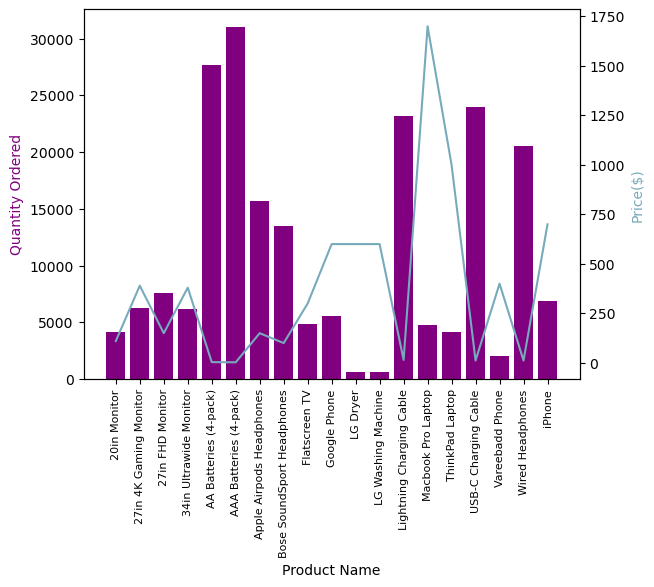

In [163]:
#why this product sold the most

fig, ax1 = plt.subplots()

ax1.bar(products.index, quantityOrdered, color = 'purple')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'purple')
ax1.set_xticklabels(products.index, rotation = 'vertical', size = 8)

ax2 = ax1.twinx()
ax2.plot(products.index, prices, '#7AB')
ax2.set_ylabel('Price($)', color = '#7AB')

plt.show()

In [49]:
salesData.to_csv('outputData.csv')